#Os medicamentos podem ser classificados de diversas maneiras: pelo seu registro, pela sua ação, pela sua restrição de uso, pela sua substância. O objetivo dessa análise é verificar algumas informações a respeito dos medicamentos registrados no Brasil no ano de 2023.

#Os dados utilizados foram extraídos da  Câmara de Regulação do Mercado de Medicamentos - CMED. Essa tabela contém os Preços Máximos ao Consumidor. Esses valores são os preços máximos pelos quais os medicamentos podem ser repassados aos consumidores pelas farmácias. Caso ocorra a venda acima desse valor, o estabelecimento fica sujeito a sofrer consequências legais.


#IMPORTANDO AS BIBLIOTECAS NECESSÁRIAS

In [176]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud

import matplotlib.pyplot as plt
plt.style.use("classic")

#LENDO O ARQUIVO
#O data frame que será analisado possui 29519 apresentações.

In [177]:
df = pd.read_excel("/content/drive/MyDrive/DATASETS/pmc.xls")

In [178]:
df.shape

(29519, 63)

In [179]:
df.sample(10)

,SUBSTÂNCIA,CNPJ,LABORATÓRIO,CÓDIGO GGREM,REGISTRO,EAN 1,EAN 2,EAN 3,PRODUTO,APRESENTAÇÃO,...,PMC 22%,PMC 22% ALC,RESTRIÇÃO HOSPITALAR,CAP,CONFAZ 87,ICMS 0%,ANÁLISE RECURSAL,LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS),COMERCIALIZAÇÃO 2022,TARJA
13707,ENOXAPARINA SÓDICA,11.643.096/0001-22,MYLAN LABORATORIOS LTDA,541521060019607,1883000760111,7898560664908,7898560665592,-,HEPTRIS,"40 MG SOL INJ CT 10 SER VD TRANS PREENCH X 0,4 ML",...,819.93,819.93,Não,Sim,Não,Não,NaN,Positiva,Sim,Tarja Vermelha
25540,RIVAROXABANA,10.588.595/0010-92,SANOFI MEDLEY FARMACÊUTICA LTDA.,576721070095206,1832604720054,7891058002145,-,-,RIVAROXABANA,15 MG COM REV CT BL AL PLAS PVC/PVDC TRANS X 30,...,234.01,234.01,Não,Não,Não,Não,NaN,Positiva,Sim,Tarja Vermelha
18625,LAMOTRIGINA,05.035.244/0001-23,SUN FARMACÊUTICA DO BRASIL LTDA,532417060018103,1468200490028,7898272941793,-,-,LAMOSYN CD,25 MG COM SUS BL AL PLAS TRANS X 30,...,196.36,196.36,Não,Sim,Sim,Não,NaN,Positiva,Não,Tarja Vermelha sob restrição
12175,DICLOFENACO,60.665.981/0001-18,UNIÃO QUÍMICA FARMACÊUTICA NACIONAL S/A,533004402152116,1049712500020,7896006249450,-,-,DICLOFENACO SÓDICO,25 MG/ML SOL INJ IM CT 50 AMP VD TRANS X 3 ML,...,122.33*,122.33*,Sim,Não,Não,Não,NaN,Positiva,Sim,Tarja Vermelha
14432,EZETIMIBA,45.987.013/0001-34,ORGANON FARMACÊUTICA LTDA.,525522050023217,1002902140029,7897337716826,-,-,ZETIA,10 MG COM CT BL AL PLAS PVC/PCTFE TRANS X 10,...,76.24,76.24,Não,Não,Não,Não,NaN,Positiva,Não,Tarja Vermelha
25162,RITUXIMABE,33.781.055/0001-35,FUNDAÇÃO OSWALDO CRUZ,541921110009607,1106301570028,7898168491029,-,-,BIO-MANGUINHOS RITUXIMABE,10 MG/ML SOL DIL INFUS CT 1 FR VD TRANS X 50 ML,...,15570.07*,13954.96*,Sim,Sim,Não,Sim,NaN,Negativa,Não,- (*)
1675,ARIPIPRAZOL,57.507.378/0003-65,EMS S/A,541823020191904,1023514170071,7894916517829,-,-,ARPEJO,15 MG COM CT BL AL AL X 30,...,1224.08,1224.08,Não,Não,Não,Não,NaN,Positiva,Sim,Tarja Vermelha sob restrição
14086,ETINILESTRADIOL,09.545.589/0001-88,MABRA FARMACEUTICA LTDA,540512070004004,1779400240011,7898505091400,-,-,DIVA,"3 MG + 0,03 MG COM REV CT BL AL/PLAS TRANS X 21",...,63.63,63.63,Não,Não,Não,Não,NaN,Positiva,Não,Tarja Vermelha
20294,MEGLUMINA;ÁCIDO IOXITALÂMICO,42.180.406/0001-43,GUERBET PRODUTOS RADIOLÓGICOS LTDA,511000702150418,1498000140041,7897854900463,-,-,TELEBRIX 30 MEGLUMINA,"66,03 G/100 ML SOL INJ CX 25 FA VD INC X 50 M...",...,1695.44*,1695.44*,Sim,Não,Não,Não,NaN,Positiva,Não,- (*)
4306,CARISOPRODOL;PARACETAMOL;CAFEÍNA;DICLOFENACO S...,05.044.984/0001-26,LEGRAND PHARMA INDÚSTRIA FARMACÊUTICA LTDA,538821010100207,1677306530025,7896004776194,-,-,TORFLAY,300 MG + 30 MG + 125 MG + 50 MG COM CT 50 BL A...,...,327.33,293.37,Não,Não,Não,Não,NaN,Negativa,Não,Tarja Vermelha


#VERIFICANDO VALORES FALTANTES
##A análise recursal é um procedimento em que a empresa detentora do registro solicita revisão do preço do medicamento;

In [180]:
df.isnull().sum()

SUBSTÂNCIA                                                   0
CNPJ                                                         0
LABORATÓRIO                                                  0
CÓDIGO GGREM                                                 0
REGISTRO                                                     0
                                                         ...  
ICMS 0%                                                      0
ANÁLISE RECURSAL                                         29286
LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS)        0
COMERCIALIZAÇÃO 2022                                         0
TARJA                                                        0
Length: 63, dtype: int64

#SUBSTÂNCIAS MAIS E MENOS COMERCIALIZADAS NO BRASIL
##Abaixo segue uma lista com as 50 substâncias mais e menos apresentações diferentes.

In [181]:
df['SUBSTÂNCIA'].value_counts().head(50)

COLECALCIFEROL                              548
RIVAROXABANA                                397
PREGABALINA                                 265
ROSUVASTATINA CÁLCICA                       258
IBUPROFENO                                  238
PARACETAMOL                                 237
OXALATO DE ESCITALOPRAM                     229
CLORIDRATO  DE ONDANSETRONA DI-HIDRATADO    228
OLANZAPINA                                  224
HEMITARTARATO DE ZOLPIDEM                   205
CLORIDRATO DE CICLOBENZAPRINA               192
RISPERIDONA                                 192
SINVASTATINA                                191
HEMIFUMARATO DE QUETIAPINA                  189
PANTOPRAZOL SÓDICO SESQUI-HIDRATADO         172
MONTELUCASTE DE SÓDIO                       172
CITRATO DE SILDENAFILA                      171
CLORIDRATO DE SERTRALINA                    166
ATORVASTATINA CÁLCICA                       156
OMEPRAZOL                                   153
CLORIDRATO DE VENLAFAXINA               

In [182]:
df['SUBSTÂNCIA'].value_counts().tail(50)

HIPROMELOSE                                                                                                                                                                                    1
HYPERICUM PERFORATUM                                                                                                                                                                           1
HYPERICUM PERFORATUM L.                                                                                                                                                                        1
IDARUCIZUMABE                                                                                                                                                                                  1
IDURSULFASE                                                                                                                                                                                    1
ILOPROSTA                          

In [183]:
df['SUBSTÂNCIA'].nunique()

2384

#PRINCIPAIS LABORATÓRIOS E QUANTOS REGISTROS ELES POSSUEM

In [184]:
df['LABORATÓRIO'].value_counts()

EMS S/A                                       1746
ACHÉ LABORATÓRIOS FARMACÊUTICOS S.A           1350
GERMED FARMACEUTICA LTDA                      1110
EUROFARMA LABORATÓRIOS S.A.                   1083
LEGRAND PHARMA INDÚSTRIA FARMACÊUTICA LTDA     949
                                              ... 
LABORATIL FARMACEUTICA LTDA                      1
EMPRESA DE TESTE LTDA. (VS01)                    1
SS WHITE ARTIGOS DENTARIOS LTDA                  1
LABORATÓRIO REGIUS LTDA.                         1
GLOBAL REGULATORY PARTNERS BRASIL LTDA           1
Name: LABORATÓRIO, Length: 278, dtype: int64

#QUANTOS LABORATÓRIOS DIFERENTES ATUAM NO BRASIL?

In [185]:
df['LABORATÓRIO'].nunique()

278

#MEDICAMENTOS CLASSIFICADOS SEGUNDO O TIPO DE TARJA
##Essa informação não está disponível em 8478 dos registros.
##A maioria dos medicamentos registrados possuem tarja vermelha, aqueles que, embora possam ser adquiridos sem receita, precisam de prescrição médica ou odontológica.
##Medicamentos de venda sob restrição são aqueles para os quais a receita é retida no momento da compra, como antibióticos, psicotrópicos entre outros.
##Medicamentos sem tarja são os conhecidos MIPs (medicamentos isentos de prescrição), que são de venda livre.
##Medicamentos tarja preta também são vendidos com retenção de receita, com potencial de causar vício.

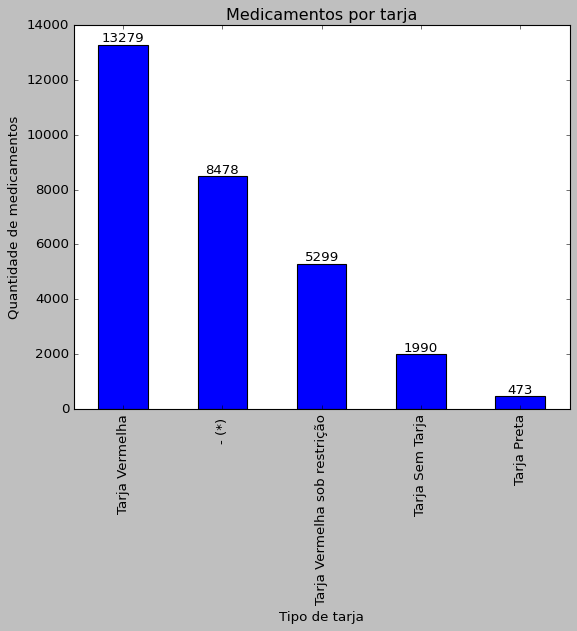

In [186]:
contagem_tarja = df['TARJA'].value_counts()

contagem_tarja.plot.bar(title="Medicamentos por tarja")
plt.xlabel("Tipo de tarja")
plt.ylabel("Quantidade de medicamentos")

for i in range(len(contagem_tarja)):
    plt.annotate(str(contagem_tarja[i]), xy=(i, contagem_tarja[i]), ha='center', va='bottom')

plt.show()

In [187]:
#MEDICAMENTOS SEGUNDO A RESTRIÇÃO HOSPITALAR

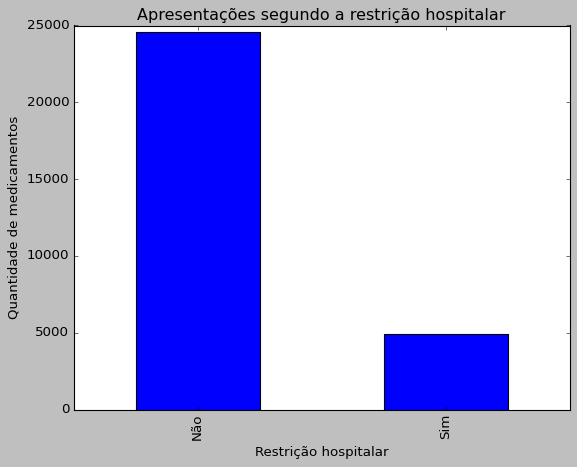

In [188]:
df['RESTRIÇÃO HOSPITALAR'].value_counts().plot.bar(title="Apresentações segundo a restrição hospitalar")
plt.xlabel("Restrição hospitalar")
plt.ylabel("Quantidade de medicamentos");

#MEDICAMENTO SEGUNDO O TIPO DE REGISTRO
##Essa informação não está disponível em 309 registros
##A Lei 9787 de 1999 instituiu o Medicamento Genérico na Saúde Pública Brasileira. É evidente o sucesso disso: 10803 apresentações de medicamentos são de genéricos. Qual o resultado disso para a população? Redução do custo de acesso aos medicamentos.
##Para as indústrias, os genéricos representam uma fatia importante do mercado, com os quais eles não possuem gastos de propaganda e marketing.

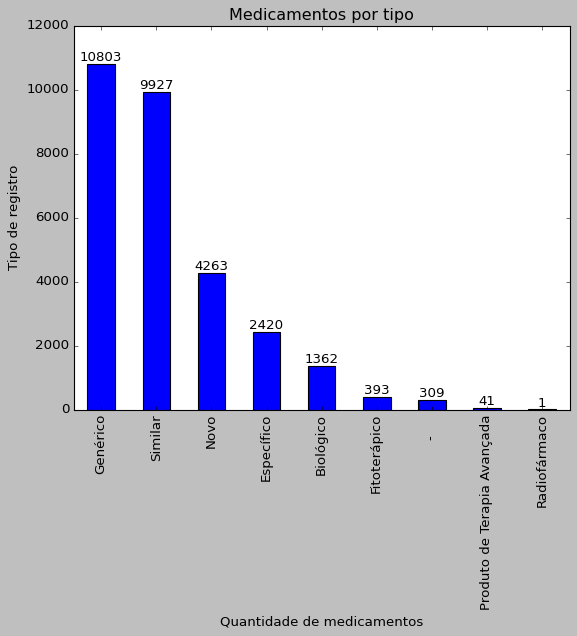

In [189]:
contagem_tipo_medicamento = df['TIPO DE PRODUTO (STATUS DO PRODUTO)'].value_counts()

contagem_tipo_medicamento.plot.bar(title="Medicamentos por tipo")
plt.xlabel("Quantidade de medicamentos")
plt.ylabel("Tipo de registro")

for i in range(len(contagem_tipo_medicamento)):
    plt.annotate(str(contagem_tipo_medicamento[i]), xy=(i, contagem_tipo_medicamento[i]), ha='center', va='bottom')

plt.show()

In [190]:
df['TIPO DE PRODUTO (STATUS DO PRODUTO)'].value_counts()


Genérico                       10803
Similar                         9927
Novo                            4263
Específico                      2420
Biológico                       1362
Fitoterápico                     393
    -                            309
Produto de Terapia Avançada       41
Radiofármaco                       1
Name: TIPO DE PRODUTO (STATUS DO PRODUTO), dtype: int64

#MEDICAMENTOS POR CLASSE TERAPÊUTICA


In [191]:
df['CLASSE TERAPÊUTICA'].value_counts()

N3A - ANTIEPILÉPTICOS                                                                 1257
N5A1 - ANTIPSICÓTICOS ATÍPICOS                                                         806
N2B2 - ANALGÉSICOS NÃO NARCÓTICOS E ANTIPIRÉTICOS ISENTOS DE PRESCRIÇÃO                696
M1A1 - ANTIRREUMÁTICOS NÃO ESTEROIDAIS PUROS                                           640
C10A1 - ESTATINAS, INIBIDORES DA REDUTASE HMG-CoA                                      636
                                                                                      ... 
K1E5 - SOLUÇÕES DE AMINOÁCIDOS PEDIÁTRICAS                                               1
B2D4 - FATOR XIII                                                                        1
G2X1 - ANTIESPASMÓDICOS GINECOLÓGICOS                                                    1
C3A4 - AGENTES DIURÉTICOS POUPADORES DE POTÁSSIO ASSOCIADOS COM DIURÉTICOS DE ALÇA       1
T1G - AGENTES PARA RADIODIAGNÓSTICO                                                      1

#QUANTAS CLASSES TERAPÊUTICAS EXISTEM?

In [192]:
df['CLASSE TERAPÊUTICA'].nunique()

540

#E EM RELAÇÃO AOS NOMES DE MARCA, QUANTOS EXISTEM?
De todos os registros, 18716 são de medicamentos que não são genéricos; temos no mercado 5741 nomes de marca.

In [193]:
df_nomes_de_marca = df[df['TIPO DE PRODUTO (STATUS DO PRODUTO)'].notnull() & (df['TIPO DE PRODUTO (STATUS DO PRODUTO)'] != 'Genérico')].copy()


In [194]:
df_nomes_de_marca.shape

(18716, 63)

In [195]:
df_nomes_de_marca['PRODUTO'].nunique()

5741

In [196]:
df_nomes_de_marca['TIPO DE PRODUTO (STATUS DO PRODUTO)'].value_counts().head(10)

Similar                        9927
Novo                           4263
Específico                     2420
Biológico                      1362
Fitoterápico                    393
    -                           309
Produto de Terapia Avançada      41
Radiofármaco                      1
Name: TIPO DE PRODUTO (STATUS DO PRODUTO), dtype: int64

In [197]:
df_nomes_de_marca['PRODUTO'].value_counts().head(15)

VITAMINA D3          59
DECOLE               38
ZOLGENSMA            37
ALFAEPOETINA         37
ENJOVIX FLASH        36
AGUA PARA INJEÇÃO    35
ADDERA D3            35
CLORETO DE SÓDIO     31
ADVIL                30
DIANEAL PD-2         29
DPREV                29
ERITROMAX            29
TRESDÊ               27
XAFAC                27
ATENOLOL             27
Name: PRODUTO, dtype: int64

##QUAL A LETRA FAVORITA PARA OS NOMES DE MARCA?
#O nome de marca de uma substância geralmente é pensado para conversar com o público.
#A maioria dos medicamentos começam com a letra C e depois a letra A.

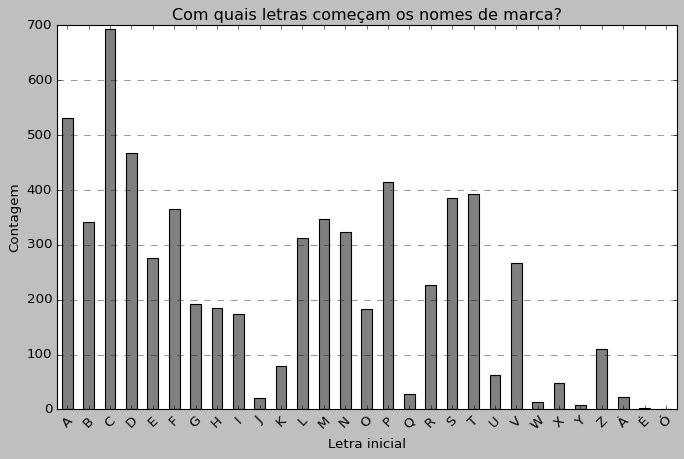

In [198]:
marcas_unicas = df['PRODUTO'].unique()

# Extrair a primeira letra de cada palavra única
letras_marcas_iniciais_unicas = [marca[0] for marca in marcas_unicas]

contagem_letras_marcas__iniciais = pd.Series(letras_marcas_iniciais_unicas).value_counts()

# Ordenar as letras iniciais
contagem_letras_marcas__iniciais = contagem_letras_marcas__iniciais.sort_index()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
contagem_letras_marcas__iniciais.plot(kind='bar', color='grey')
plt.title('Com quais letras começam os nomes de marca?')
plt.xlabel('Letra inicial')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##Uma prova de que os nomes de medicamentos sempre precisam conversar com o público são os nomes dos anticoncepcionais. Sempre são nomes femininos ou nomes que suscitam feminilidade... como Diana, Lolita, Niki, Ingrid

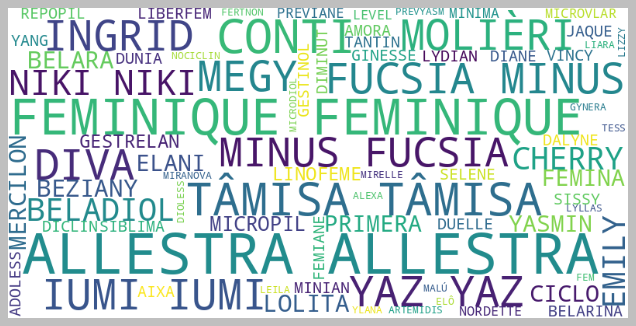

In [199]:
nomes_anticoncepcionais = df[(df['CLASSE TERAPÊUTICA'] == 'G3A1 - HORMÔNIOS CONTRACEPTIVOS MONOFÁSICOS COM ESTROGÊNIOS <50MCG') & (df['TIPO DE PRODUTO (STATUS DO PRODUTO)'] != 'Genérico')]['PRODUTO']

# Concatenar todos os nomes de produtos em uma única string
nomes_produtos_string = ' '.join(nomes_anticoncepcionais)

# Criar a nuvem de palavras
nuvem_palavras = WordCloud(width=800, height=400, background_color='white').generate(nomes_produtos_string)

# Plotar a nuvem de palavras
plt.figure(figsize=(10, 6))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

##Já os medicamentos para disfunção sexual, como eu disse, conversam com seu público. Nomes que remetem a levantar algo ou a cor azul

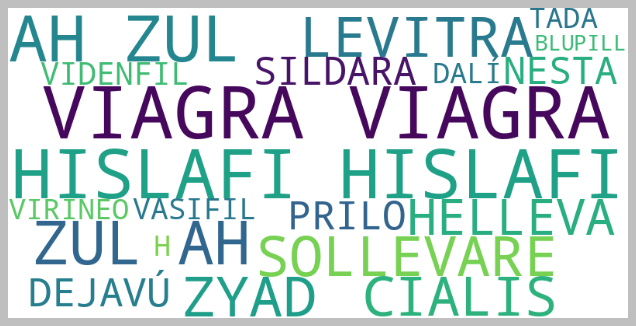

In [200]:
nomes_disfuncao = df[(df['CLASSE TERAPÊUTICA'] == 'G4E1 - PRODUTOS PARA DISFUNÇÃO ERÉTIL, INIBIDORES DA PDE5') & (df['TIPO DE PRODUTO (STATUS DO PRODUTO)'] != 'Genérico')]['PRODUTO']

# Concatenar todos os nomes de produtos em uma única string
nomes_produtos_string = ' '.join(nomes_disfuncao)

# Criar a nuvem de palavras
nuvem_palavras = WordCloud(width=800, height=400, background_color='white').generate(nomes_produtos_string)

# Plotar a nuvem de palavras
plt.figure(figsize=(10, 6))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

# QUAL O MEDICAMENTO MAIS CARO NO BRASIL?
Bem, esse título está meio sensacionalista. Os valores mostrados abaixo são os preços máximos que esses medicamentos podem ser repassados ao consumidor. O Piauí é o estado com a alíquota mais cara e, portanto, o lugar no Brasil onde os medicamentos poderiam ser adquiridos pelo preço mais caro.

In [201]:
#tratando os dados da coluna PCM 21%
df['PMC 21%'] = df['PMC 21%'].str.replace('*', '')
df['PMC 21%'] = df['PMC 21%'].astype(float)
df['PMC 21%'].mean()

<ipython-input-201-3acd9863866e>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['PMC 21%'] = df['PMC 21%'].str.replace('*', '')


19174.558072089163

In [202]:
df['PMC 21%'].nlargest(15)

22551    13228653.6
22552    13228653.6
22553    13228653.6
22554    13228653.6
22555    13228653.6
22556    13228653.6
22557    13228653.6
22558    13228653.6
22559    13228653.6
22560    13228653.6
22561    13228653.6
22562    13228653.6
22563    13228653.6
22564    13228653.6
22565    13228653.6
Name: PMC 21%, dtype: float64

In [203]:
df.loc[df['PMC 21%'].idxmax()]

SUBSTÂNCIA                                               ONASEMNOGENO ABEPARVOVEQUE
CNPJ                                                             56.994.502/0001-30
LABORATÓRIO                                                NOVARTIS BIOCIENCIAS S.A
CÓDIGO GGREM                                                        526520120096607
REGISTRO                                                              1006811740018
                                                                    ...            
ICMS 0%                                                                         Não
ANÁLISE RECURSAL                                                               (AR)
LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS)                      Negativa
COMERCIALIZAÇÃO 2022                                                            Não
TARJA                                                                Tarja Vermelha
Name: 22551, Length: 63, dtype: object

#O medicamento ONASEMNOGENO ABEPARVOVEQUE (Zolgensma) é utilizado na Atrofia Muscular Espinhal. Sua integração no rol de tecnologias no SUS foi em 2022.